### Shakespeare classification

-  Preprocess 
-  Encod data 

-  classification

In [25]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

### Processing Data 
- loading data
- checking duplicate data and checking the row with none value
- droping some non-using data

In [2]:
df = pd.read_csv('../data/Shakespeare_data.csv')

In [3]:
df.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


#### Checking duplicate data and drop null value

In [4]:
duplicateRowsDF = df.duplicated()
df.dropna(axis=0, how='any', inplace=True)
sum(duplicateRowsDF)

0

### my first idea is droping dataLine. Dataline is uselsee since we already have in table.

In [5]:
df=df.drop(columns=['Dataline'])

In [6]:
df.head(1000)

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...
1042,Henry IV,15.0,2.4.50,FRANCIS,"England, I could find in my heart."
1043,Henry IV,16.0,2.4.51,POINS,[Within] Francis!
1044,Henry IV,17.0,2.4.52,FRANCIS,"Anon, sir."
1045,Henry IV,18.0,2.4.53,PRINCE HENRY,"How old art thou, Francis?"


### my sceond idea data is about Encoding data . 
- Transfer str type data to unique number.

In [7]:
number = LabelEncoder()
df['Player'] = number.fit_transform(df['Player'].astype('str'))
df['Play'] = number.fit_transform(df['Play'].astype('str'))
df['PlayerLine'] = number.fit_transform(df['PlayerLine'].astype('str'))
df['ActSceneLine'] = number.fit_transform(df['ActSceneLine'].astype('str'))

In [14]:
df.head(1000)

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,9,1.0,324,457,60240
4,9,1.0,435,457,23568
5,9,1.0,546,457,4998
6,9,1.0,657,457,73793
7,9,1.0,768,457,48893
...,...,...,...,...,...
1042,9,15.0,5093,278,22333
1043,9,16.0,5104,652,90837
1044,9,17.0,5115,278,11008
1045,9,18.0,5126,663,32228


### Building Classfiction Model (80% training, 20% testing) 
- Decision tree
- naive_bayes
- KNN

#### Sperate the training data and test data

In [29]:

x = df[['PlayerLine','Play','PlayerLinenumber','ActSceneLine']]
y = df['Player']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

##### Training Decision Tree and print accuracy

In [27]:
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:

y_pred = DecisionTree_model.predict(x_test)
Dec_accuracy = accuracy_score(y_test, y_pred)*100
print('The DecsionTree accuracy are:',Dec_accuracy)

The DecsionTree accuracy are: 71.52774475773857


##### Training naive-bayes model and print accuracy

In [12]:
Gaussian_model = GaussianNB()
Gaussian_model.fit(x_train, y_train)
y_pred = Gaussian_model.predict(x_test)
Gau_accuracy = accuracy_score(y_test, y_pred)*100
print('The Gaussian_model accuracy are:',Gau_accuracy)

The Gaussian_model accuracy are: 19.732775426750987


##### Training KNN_model and print accuracy

In [13]:
Kn_model = KNeighborsClassifier()
Kn_model.fit(x_train, y_train)
y_pred = Kn_model.predict(x_test)
Kn_accuracy = accuracy_score(y_test, y_pred)*100
print('The Kn_model accuracy are:',Kn_accuracy)

The Kn_model accuracy are: 5.677333460130283


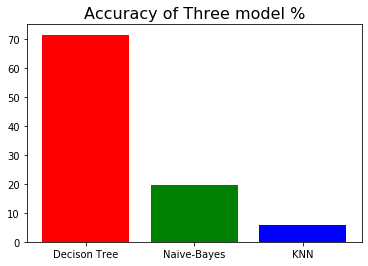

In [31]:
name_list = ['Decison Tree','Naive-Bayes','KNN']
num_list = [71.52774475773857,19.732775426750987,5.677333460130283]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.title("Accuracy of Three model %",fontsize=16)
plt.show()

## Conclusion

In project 2, I used 4 features to determine the player which are PlayerLinenumber,ActSceneLine,Player,PlayerLine. Regarding the choice of classification model, I chose decision tree, naive-bayes, and k-neighbour, among which decision tree has 72% accuracy, and the rest have 19% and 6% accuracy respectively. I think the structure of Shakespear_data more fit Decision Tree cause this accuracy. 